# IPython is Really cool

## It has many uses combining markdown with python
Some uses are
- Document generation
- Prototyping
- Data Analysis
- showing Example code

# Setup Enviornment

```bash
python3 -m venv .venv
source .venv/bin/activate
python3 -m pip install -r requirements.txt
```

# Example 1 Computer vision
Imprt the libraries you need 

In [59]:
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

## 1. Read image in and convert the color

In [60]:
img = cv2.imread('images/test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img[:,:,::-1]


## 2. Show Original and Graysacale
- By default opencv reads in BGR.

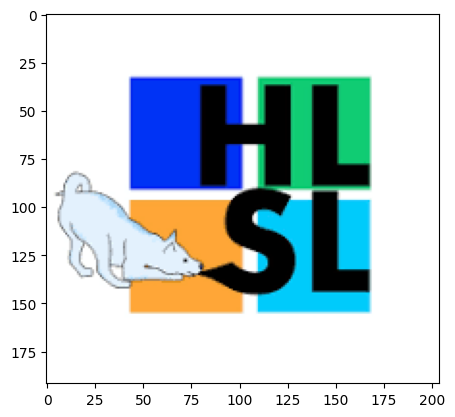

In [61]:
plt.imshow(img)


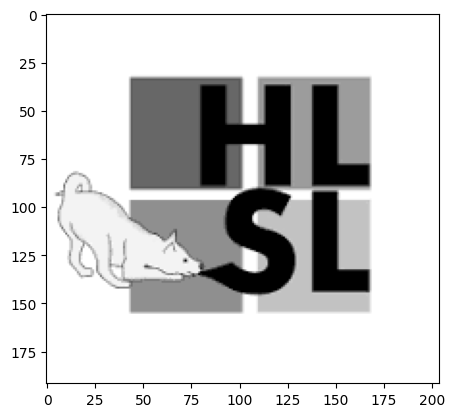

In [62]:
plt.imshow(gray, cmap='gray')

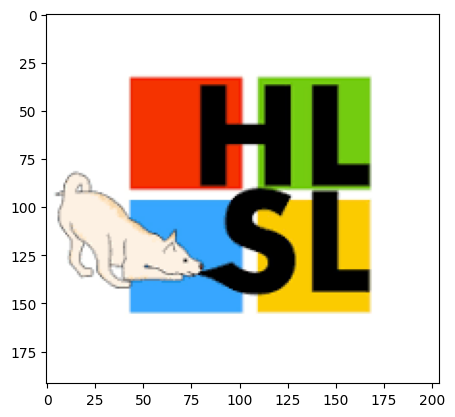

In [63]:
plt.imshow(img2)


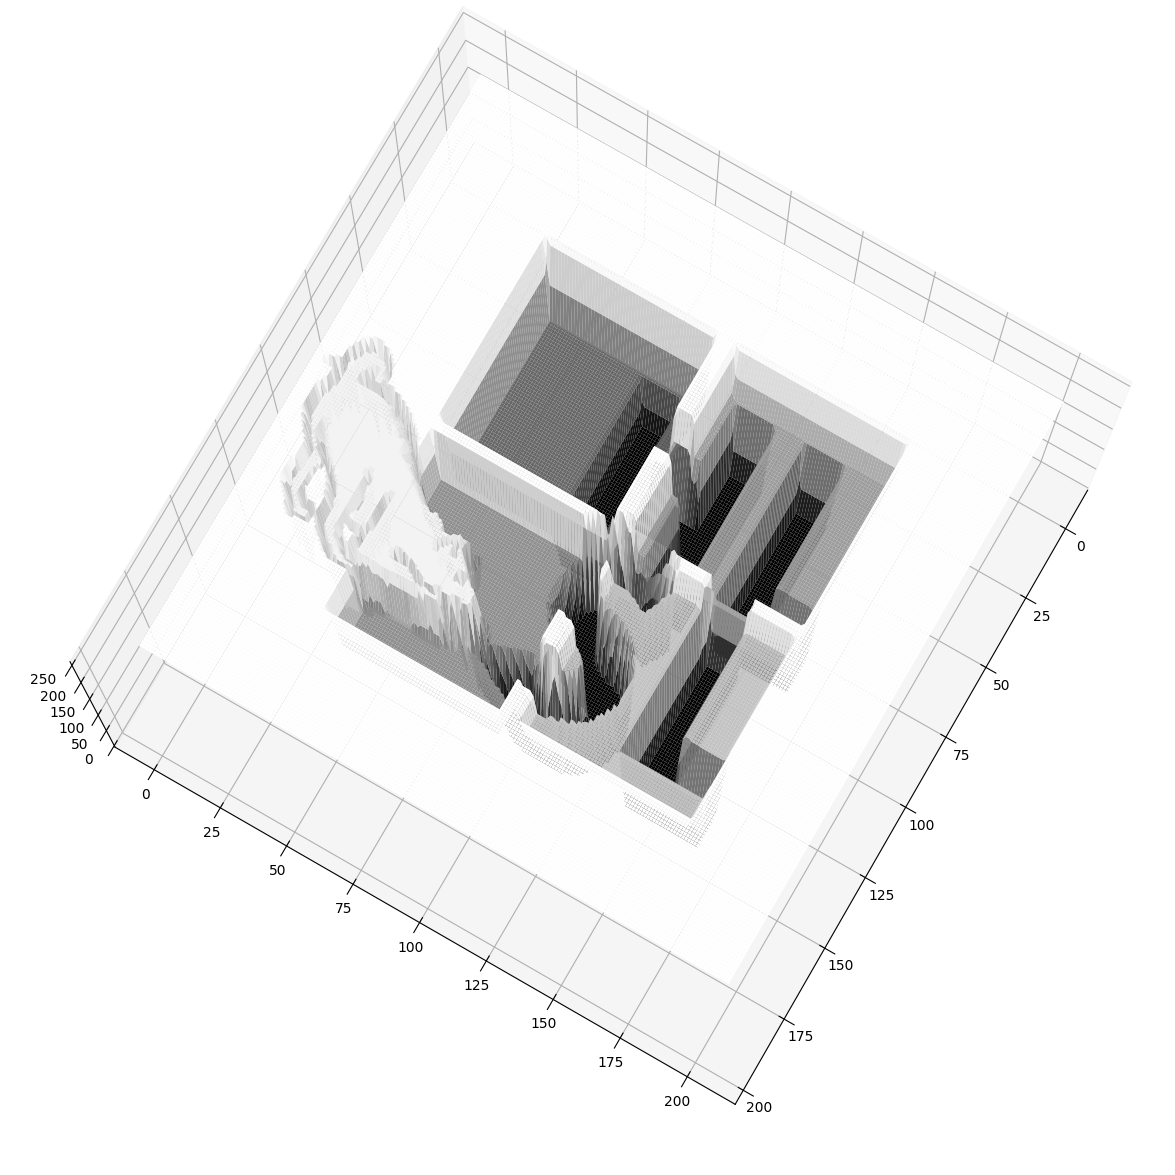

In [64]:
x, y = np.mgrid[0:gray.shape[0], 0:gray.shape[1]]
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x, y, gray, rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
ax.view_init(80, 30)
plt.show()

# Example 2 using an interactive graphing library
Downside these don't show up in github

In [65]:
import plotly
from plotly.graph_objs import graph_objs as go
from ipywidgets import interact
from IPython.display import Image
plotly.offline.init_notebook_mode()
from plotly.offline import iplot

populations = {"Atlanta" : 1,
               "Boston" : 2,
               "SLC" : 1,
               "Chicago" : 1,
               "Seattle" : 5,
               "San Jose" : 1}

def view_image():
    global populations
    fig_pie = go.Pie(labels = list(populations.keys()), values = list(populations.values()))
    iplot([fig_pie])
    fig = go.Figure()
    fig.add_trace(fig_pie)
view_image()

# Example 3 building a table the pretty way

In [66]:
from IPython.display import HTML, display
import pandas as pd

col = ['DXIL Opcode',
             'DXIL OpName',
             "Shader Model",
             "Shader Stages",
             "Shader Category",
             "DXIL Docs"]
data = [
    [
        25,	'Rsqrt', 6.0, 'all',	'Unary float', 'returns reciprocal square root (1 / sqrt(src)'
    ],
    [
        6,'FAbs',	6.0,	'all', 'Unary float', 'returns the absolute value of the input value.'
    ],
]
df = pd.DataFrame(data, columns=col)
sorted_df = df.sort_values(by=['DXIL Opcode'], ascending=True)
display(HTML(sorted_df.to_html()))

# Example 3 Fourier Transform
We can also show  how to work with matricies really easily.
In this example I'm going to show FFTs.

The Fourier transform can be derived via the eigen-decomposition of circulant matrices. In particular, the Eigenvectors of any circulant matrix are the same, and they are the Fourier basis. I show this below.

## Import some python modules

In [67]:
%matplotlib inline

import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1. Create circulant matrix:

In [68]:
H = np.array([[1,1,0,0,0,0,0,1],
              [1,1,1,0,0,0,0,0],
              [0,1,1,1,0,0,0,0],
              [0,0,1,1,1,0,0,0],
              [0,0,0,1,1,1,0,0],
              [0,0,0,0,1,1,1,0],
              [0,0,0,0,0,1,1,1],
              [1,0,0,0,0,0,1,1]])

## Do eigen-decomposition and print the matrix:

In [69]:
v,E = np.linalg.eig(H)
print(np.round(np.dot(E,np.dot(np.diag(v),np.linalg.inv(E)))).astype(int))

[[1 1 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 1 1 1 0 0 0]
 [0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 0]
 [0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 1 1]]


## Now Lets show off some plotting
In this example we are going to use matplot. 
Matplot generates static images so they will show up
when we commit to github. It has the downside of making the graphs look a bit dated

All that said Let's plot (using the sort order of the eignevalues from high to low):


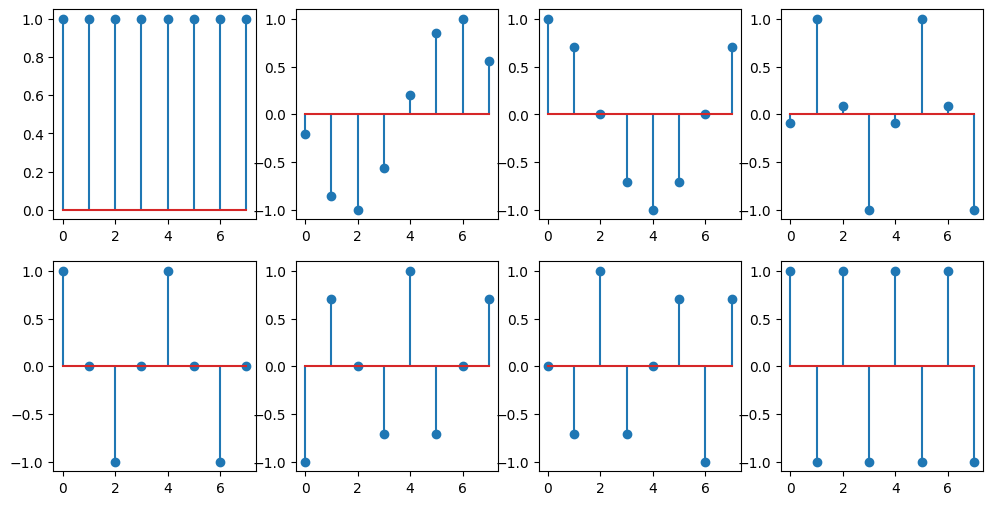

In [70]:
I = np.flip(np.argsort(v))    
E = E/np.amax(E,0)
fig, axes = plt.subplots(2,4, figsize=(12,6))
for i in range(8): 
    axes[int(i/4),i % 4].stem(E[:,I[i]])

The basis gotten from Eig is not exact, because of complex numbers like `i`  so let's compare with explicitly constructed Fourier basis, which does use complex numbers:

/Users/farzon/Projects/ipython_demo/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning:

Casting complex values to real discards the imaginary part

/Users/farzon/Projects/ipython_demo/.venv/lib/python3.12/site-packages/numpy/ma/core.py:3387: ComplexWarning:

Casting complex values to real discards the imaginary part

/Users/farzon/Projects/ipython_demo/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning:

Casting complex values to real discards the imaginary part



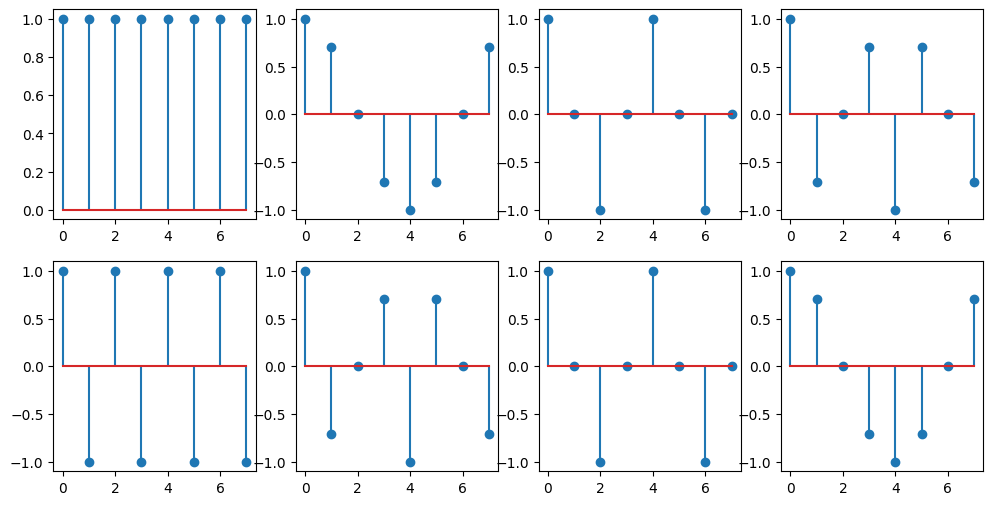

In [71]:
root = (0+2j)*math.pi/8
F = np.array([np.exp([root*i*j*k for k in range(8)]) for j in range(8)])

fig, axes = plt.subplots(2,4, figsize=(12,6))
for i in range(8): 
    axes[int(i/4),i % 4].stem(F[i])

## Hence, we can define the Fourier and inverse Fourier transform as:

In [72]:
invF = np.linalg.inv(F)
def FT(t): return np.dot(invF,t) # analysis
def IFT(f): return np.dot(F,f) # synthesis

## With this, we can create Fourier pairs:

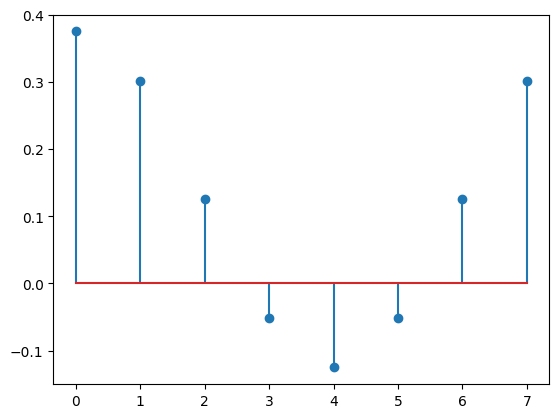

In [73]:
f=FT(H[0]);plt.stem(f);

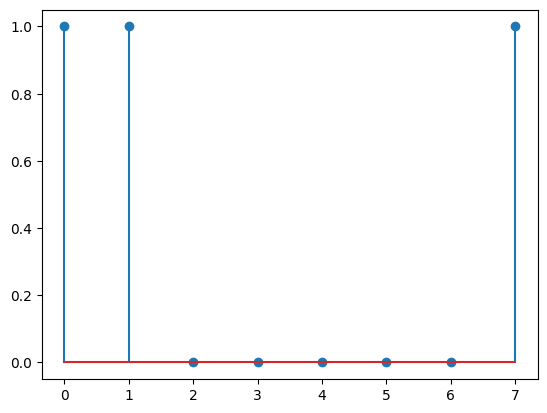

In [74]:
plt.stem(IFT(f));

## And here is the Fourier convolution theorem to work, illustrated:

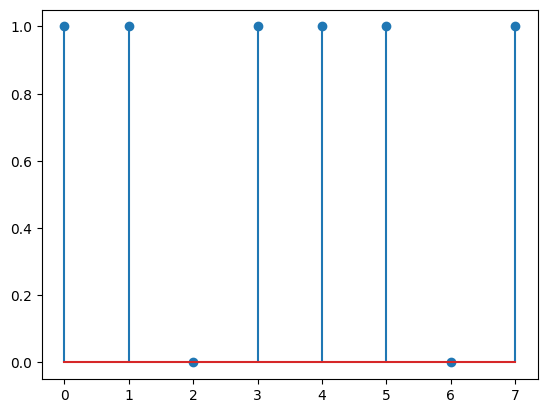

In [75]:
plt.stem(np.dot(H,[1,0,0,0,1,0,0,0]));

# Example 4, 3D graphics and widgets

In [76]:
from helper import readMesh,visualizeMesh,getVertsAndFaces,updateMesh,plotTriangleNormal,initialize,updateScatter,plotPolygon
from numpy import array, cross, dot, matmul
from numpy.linalg import norm
from math import cos, sin, atan2, pi
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [77]:
light = dict(
    position = [0.5, 2.0, -5.0], # [x, y, z]
    color = [1.0, 1.0, 1.0] # [red, green, blue]
)
camera = dict(
    eye = [0.0,0,-3.0], # [x, y, z]
    lookAt = [3.0,1.0,1.0] # [x, y, z]
)
object = dict(
    scale = [0.2, 0.2, 0.2],
    position = [2.0, 2.0, 2.0], # [tx, ty, tz]
    orientation = [pi,pi,pi], # [θx, θy, θz]
    color = [1.0, 0.0, 0.0] # [red, green, blue]
)
projection = dict(
    fov = pi/2,
    aspectRatio = 1.0,
    near = 1.0,
    far = 12.0
)

initialize(camera["eye"], camera["lookAt"],light["position"], light["color"])


# Loading in RAW Triangles

We are given raw triangles in the form of a text file where every line is a triangle represented by Ax,Ay,Az,Bx,By,Bz,Cx,Cy,Cz, where A, B, and C are vertexes in 3D space X, Y, Z. First parse each each line of the raw triangle file ``shark_ag.raw`` and output an array of triangles structured:

$$
\begin{bmatrix} 
Ax & Ay & Az & 1 \\
Bx & By & Bz & 1 \\
Cx & Cy & Cz & 1 \\
\end{bmatrix}
\quad
$$


In [78]:
# Lets load in the .raw file and visualize it
triangles = readMesh("mesh/shark_ag.raw")
visualizeMesh(triangles, triangles);

FigureWidget({
    'data': [{'color': 'red',
              'i': array([   0,    3,    3, ..., 2960, 2939, 2978]),
              'j': array([   1,    4,    6, ..., 2976, 2936, 2979]),
              'k': array([   2,    5,    4, ..., 2977, 2943, 2980]),
              'opacity': 0.8,
              'type': 'mesh3d',
              'uid': '73673167-1aad-4765-9f42-00aaa8cef178',
              'x': array([-0.92, -0.91, -0.87, ..., -0.92, -0.96, -0.99]),
              'y': array([-0.43, -0.45, -0.52, ..., -0.67, -0.66, -0.66]),
              'z': array([7.37, 7.24, 7.26, ..., 6.84, 6.8 , 6.75])},
             {'color': 'white',
              'i': array([   0,    3,    3, ..., 2960, 2939, 2978]),
              'j': array([   1,    4,    6, ..., 2976, 2936, 2979]),
              'k': array([   2,    5,    4, ..., 2977, 2943, 2980]),
              'opacity': 1.0,
              'type': 'mesh3d',
              'uid': 'b58da753-731b-4841-9906-6f342960a183',
              'x': array([-0.92, -0.91, -0.

# World Transform

We need to do the following matrix transformation operations on 

$$
\begin{bmatrix} 
Ax & Ay & Az & 1 \\
Bx & By & Bz & 1 \\
Cx & Cy & Cz & 1 \\
\end{bmatrix}
$$

## Scale Matrix (LHS) - x, y, z

$$
\begin{bmatrix} 
S_x & 0 & 0 & 0 \\
0 & S_y & 0 & 0\\
0 & 0 & S_z & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\quad
\quad
$$

## Rotation Matrix (LHS) - x, y, z

$$
\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & cos\theta_x & sin\theta_x & 0 \\
0 & -sin\theta_x & cos\theta_x & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\quad
\quad


\begin{bmatrix} 
cos\theta_y & 0 & -sin\theta_y & 0 \\
0 & 1 & 0 & 0 \\
sin\theta_y & 0 & cos\theta_y & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\quad
\quad


\begin{bmatrix} 
cos\theta_z & sin\theta_z & 0 & 0 \\
-sin\theta_z & cos\theta_z & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

## Translation

$$
\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
T_x & T_y & T_z & 1 \\
\end{bmatrix}
\quad
$$





# Example 5 Machine Learning
## Confusion matrix


Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.



Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


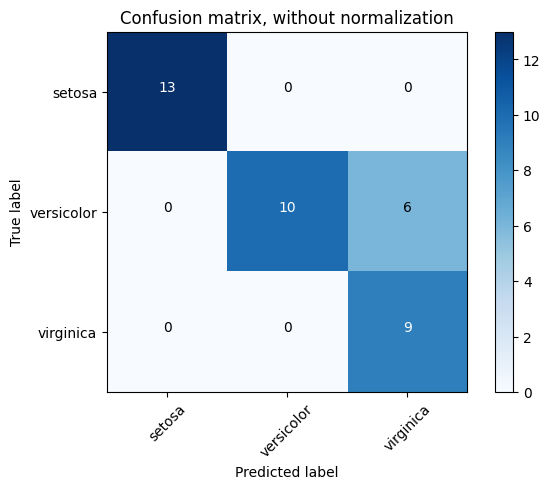

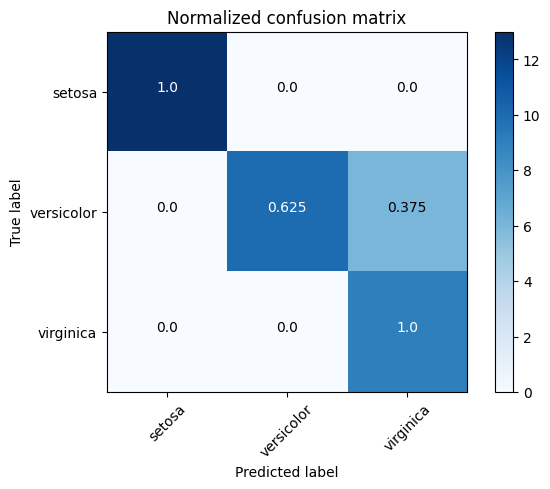

In [79]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()